# Analyse Partie 1 : Comparaison ODE

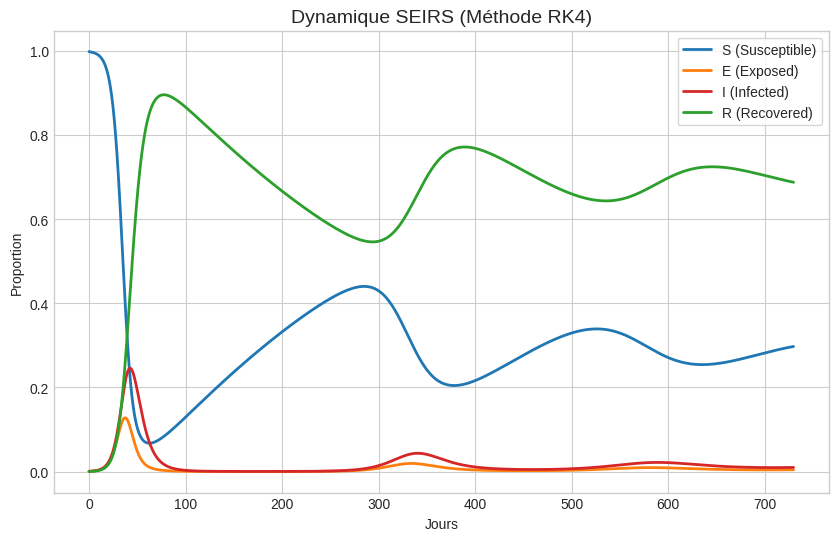

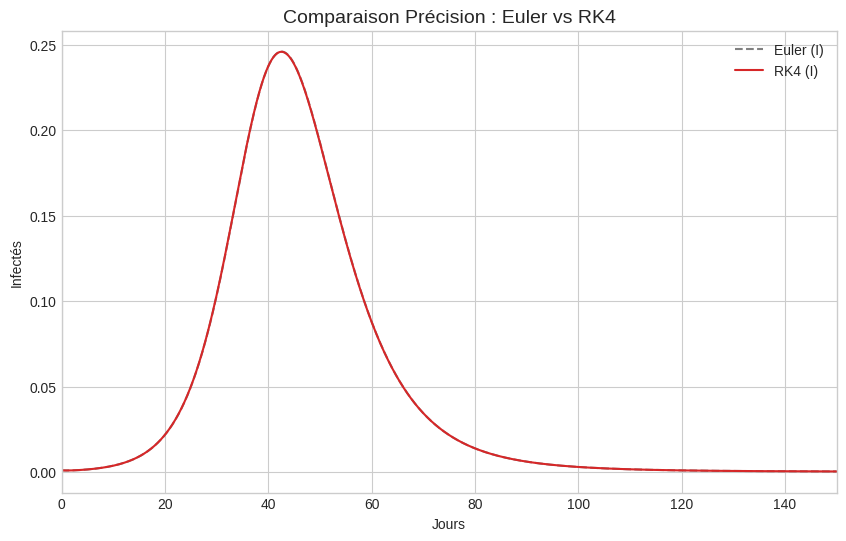

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize']=(10,6)

# Chargement
df_py_rk4 = pd.read_csv('results_py_rk4.csv')
df_py_euler = pd.read_csv('results_py_euler.csv')
df_c_rk4 = pd.read_csv('results_c_rk4.csv')

# Graphique 1 : Dynamique Globale (Couleurs significatives)
plt.figure()
plt.plot(df_py_rk4['jour'], df_py_rk4['S'], label='S (Susceptible)', color='#1f77b4', linewidth=2)
plt.plot(df_py_rk4['jour'], df_py_rk4['E'], label='E (Exposed)', color='#ff7f0e', linewidth=2)
plt.plot(df_py_rk4['jour'], df_py_rk4['I'], label='I (Infected)', color='#d62728', linewidth=2)
plt.plot(df_py_rk4['jour'], df_py_rk4['R'], label='R (Recovered)', color='#2ca02c', linewidth=2)
plt.title('Dynamique SEIRS (Méthode RK4)', fontsize=14)
plt.xlabel('Jours')
plt.ylabel('Proportion')
plt.legend(frameon=True)
plt.show()

# Graphique 2 : Comparaison Euler vs RK4 (Zoom pic)
plt.figure()
plt.plot(df_py_euler['jour'], df_py_euler['I'], label='Euler (I)', color='gray', linestyle='--')
plt.plot(df_py_rk4['jour'], df_py_rk4['I'], label='RK4 (I)', color='#d62728', linestyle='-')
plt.xlim(0, 150)
plt.title('Comparaison Précision : Euler vs RK4', fontsize=14)
plt.xlabel('Jours')
plt.ylabel('Infectés')
plt.legend()
plt.show()

## Comparaison langages

In [4]:
## Comparaison 1 : Même méthode (RK4), langages différents

import numpy as np
print("=" * 60)
print("COMPARAISON PYTHON RK4 vs C RK4")
print("=" * 60)

# Calcul des différences absolues
diff_lang = np.abs(df_py_rk4[['S','E','I','R']] - df_c_rk4[['S','E','I','R']])

print("\nErreur absolue maximale par compartiment:")
print(diff_lang.max())

print("\nErreur quadratique moyenne (RMSE):")
print(np.sqrt((diff_lang**2).mean()))

print("\n✓ Les résultats sont identiques aux erreurs d'arrondi près")


COMPARAISON PYTHON RK4 vs C RK4

Erreur absolue maximale par compartiment:
S    4.999937e-07
E    4.999895e-07
I    4.999959e-07
R    4.999963e-07
dtype: float64

Erreur quadratique moyenne (RMSE):
S    2.879548e-07
E    2.896208e-07
I    2.887540e-07
R    2.885509e-07
dtype: float64

✓ Les résultats sont identiques aux erreurs d'arrondi près


## Comparaison méthodes

COMPARAISON EULER vs RK4 (Python)

Erreur max |I_euler - I_rk4|: 3.678926e-04
Erreur moyenne: 2.959372e-05


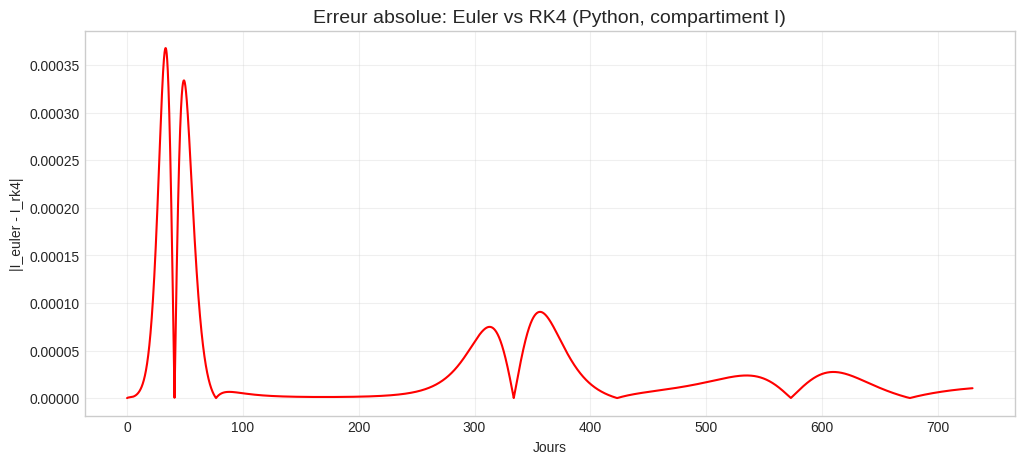


✓ RK4 est plus précis que Euler (erreur d'ordre supérieur)


In [5]:
## Comparaison 2 : Même langage (Python), méthodes différentes

print("=" * 60)
print("COMPARAISON EULER vs RK4 (Python)")
print("=" * 60)

# Différence sur les infectés
diff_method = np.abs(df_py_euler[['I']] - df_py_rk4[['I']])

print(f"\nErreur max |I_euler - I_rk4|: {diff_method['I'].max():.6e}")
print(f"Erreur moyenne: {diff_method['I'].mean():.6e}")

# Graphique de l'erreur
plt.figure(figsize=(12,5))
plt.plot(df_py_euler['jour'], diff_method['I'], color='red', linewidth=1.5)
plt.title('Erreur absolue: Euler vs RK4 (Python, compartiment I)', fontsize=14)
plt.xlabel('Jours')
plt.ylabel('|I_euler - I_rk4|')
plt.grid(True, alpha=0.3)
plt.show()

print("\n✓ RK4 est plus précis que Euler (erreur d'ordre supérieur)")
